# Understanding Descriptive Statistics

Import the necessary libraries here:

In [55]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import random as rand

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [152]:
# your code here
def dices(attempts):
    columns=['result']
    dices={}
    for i in range (1,attempts):
        dices[i]=rand.randint(1,6)
    
    return pd.DataFrame.from_dict(dices,orient='index',columns=columns).sort_values('result')


In [156]:
dices(11)

,result
5,1
4,2
2,3
1,4
3,4
6,4
10,4
7,5
9,5
8,6


In [157]:
df

,level_0,index,result
0,0,9,1
1,1,3,3
2,2,8,3
3,3,10,3
4,4,5,4
5,5,6,4
6,6,1,5
7,7,2,6
8,8,4,6
9,9,7,6


#### 2.- Plot the results sorted by value.

<AxesSubplot:>

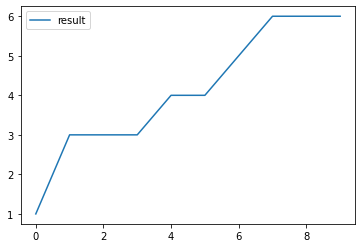

In [158]:
# your code here
df.plot(y="result")

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [159]:
# your code here
df_freq=df[['result','index']].groupby('result').agg('count')
df_freq


,index
result,
1,1
3,3
4,2
5,1
6,3


<AxesSubplot:xlabel='result'>

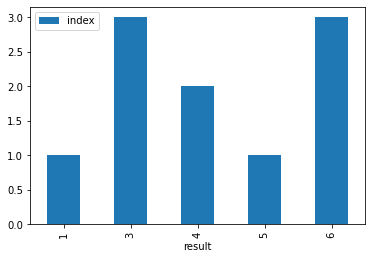

In [160]:
df_freq.plot.bar()

C:\Users\oshav\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


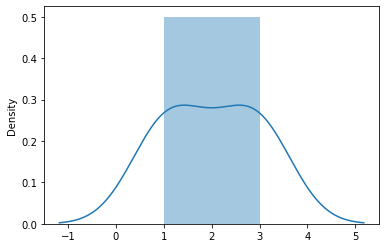

In [35]:
sns.distplot(df_freq);

In [ ]:
"""
your comments here
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [161]:
# your code here
def mean(x):
    y=x.sum(axis=0)/x.count()
    return y

In [162]:
mean(df['result'])

4.1

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [163]:
# your code here
mean(df_freq['index'])

2.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [164]:
# your code here
def median(x):
    if x.count()%2==0:
        y=x.count()/2
        y=y.astype(int)
        median=(x.iloc[y]+x.iloc[y-1])/2
    else:
        y=x.count()
        y=(y+1)/2
        y=y.astype(int)
        median=x.iloc[y]
    return median

In [165]:
median(df['result'])

4.0

In [166]:
df['result'].median()

4.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [229]:
#def quartile(x):
df['result'].min()
Q4=df['result'].max()
h=df['result'].max()-df['result'].min()
q=h/4
q
Q1=df['result'].min()+q
Q2=Q1+q
Q3=Q2+q
Q4
quartile=[Q1,Q2,Q3,Q4]
quartile

[2.25, 3.5, 4.75, 6]

In [228]:
Q2

7.25

In [211]:
df.describe()

,level_0,index,result
count,10.00000,10.00000,10.00000
mean,4.50000,5.50000,4.10000
std,3.02765,3.02765,1.66333
min,0.00000,1.00000,1.00000
25%,2.25000,3.25000,3.00000
50%,4.50000,5.50000,4.00000
75%,6.75000,7.75000,5.75000
max,9.00000,10.00000,6.00000


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [168]:
# your code here
df_1=pd.read_csv(r'C:/Users/oshav/DAFT_NOV_21_01/module_2/Lab_4_Descriptive_Statistics/roll_the_dice_hundred.csv')
df_1.head()

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


<AxesSubplot:>

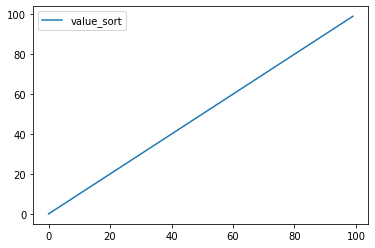

In [179]:
"""
your comments here
"""
df_1['value_sort']=df_1.sort_values(['value'])
df_1.plot(y='value_sort')

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [180]:
# your code here
mean(df_1['value_sort'])

49.5

#### 3.- Now, calculate the frequency distribution.


In [189]:
# your code here
df_freq1=df_1[['value','roll']].groupby('value').agg('count')
df_freq1.reset_index(inplace=True)
df_freq1

,value,roll
0,1,12
1,2,17
2,3,14
3,4,22
4,5,12
5,6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:xlabel='value', ylabel='Count'>

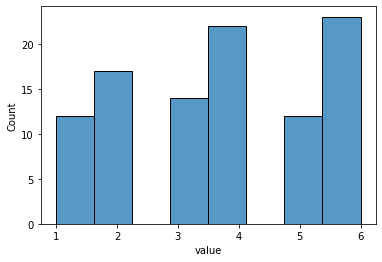

In [199]:
# your code here
sns.histplot(data=df_1,x='value')

In [ ]:
"""
your comments here
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [214]:
# your code here
df_2=pd.read_csv(r'C:/Users/oshav/DAFT_NOV_21_01/module_2/Lab_4_Descriptive_Statistics/roll_the_dice_thousand.csv')
df_2

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
...,...,...,...
995,995,995,1
996,996,996,4
997,997,997,4
998,998,998,3


<AxesSubplot:xlabel='value', ylabel='Count'>

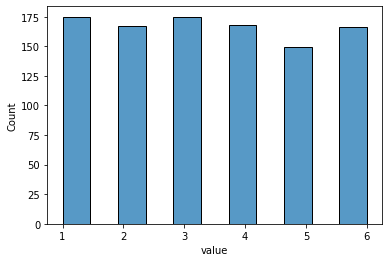

In [215]:
"""
your comments here
"""
sns.histplot(data=df_2,x='value')

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

<AxesSubplot:xlabel='observation', ylabel='Count'>

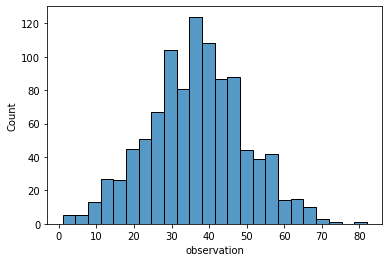

In [218]:
# your code here
df_3=pd.read_csv(r'C:/Users/oshav/DAFT_NOV_21_01/module_2/Lab_4_Descriptive_Statistics/ages_population.csv')
df_3
sns.histplot(data=df_3,x='observation')

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [221]:
# your code here
df_3.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

<AxesSubplot:xlabel='observation', ylabel='Count'>

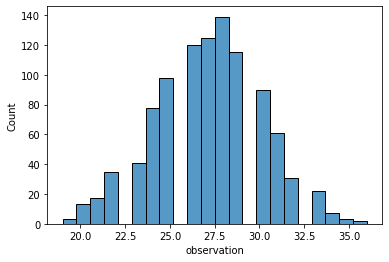

In [222]:
# your code here
df_4=pd.read_csv(r'C:/Users/oshav/DAFT_NOV_21_01/module_2/Lab_4_Descriptive_Statistics/ages_population2.csv')
df_4
sns.histplot(data=df_4,x='observation')

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [223]:
# your code here
df_4.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

<AxesSubplot:xlabel='observation', ylabel='Count'>

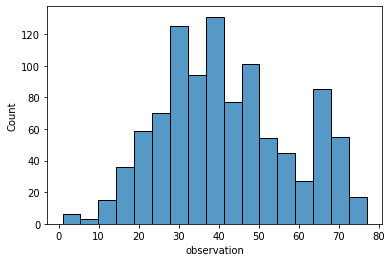

In [224]:
# your code here
df_5=pd.read_csv(r'C:/Users/oshav/DAFT_NOV_21_01/module_2/Lab_4_Descriptive_Statistics/ages_population3.csv')
df_5
sns.histplot(data=df_5,x='observation')

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [225]:
# your code here
df_5.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
# your code here


In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""